***

### CO2 observado

sm.datasets.co2 es un módulo de la librería Statsmodels en Python que contiene un conjunto de datos relacionado con las emisiones de dióxido de carbono (CO2) en la atmósfera. Este conjunto de datos se obtuvo de la Base de datos de la Mauna Loa Observatory en Hawái, que recolecta datos de las emisiones de CO2 desde 1959. El conjunto de datos contiene la concentración de CO2 en partes por millón (ppm) medida cada mes.

https://www.statsmodels.org/dev/datasets/generated/co2.html

In [184]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

dataset = sm.datasets.co2.load_pandas()
co2 = dataset.data
co2

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


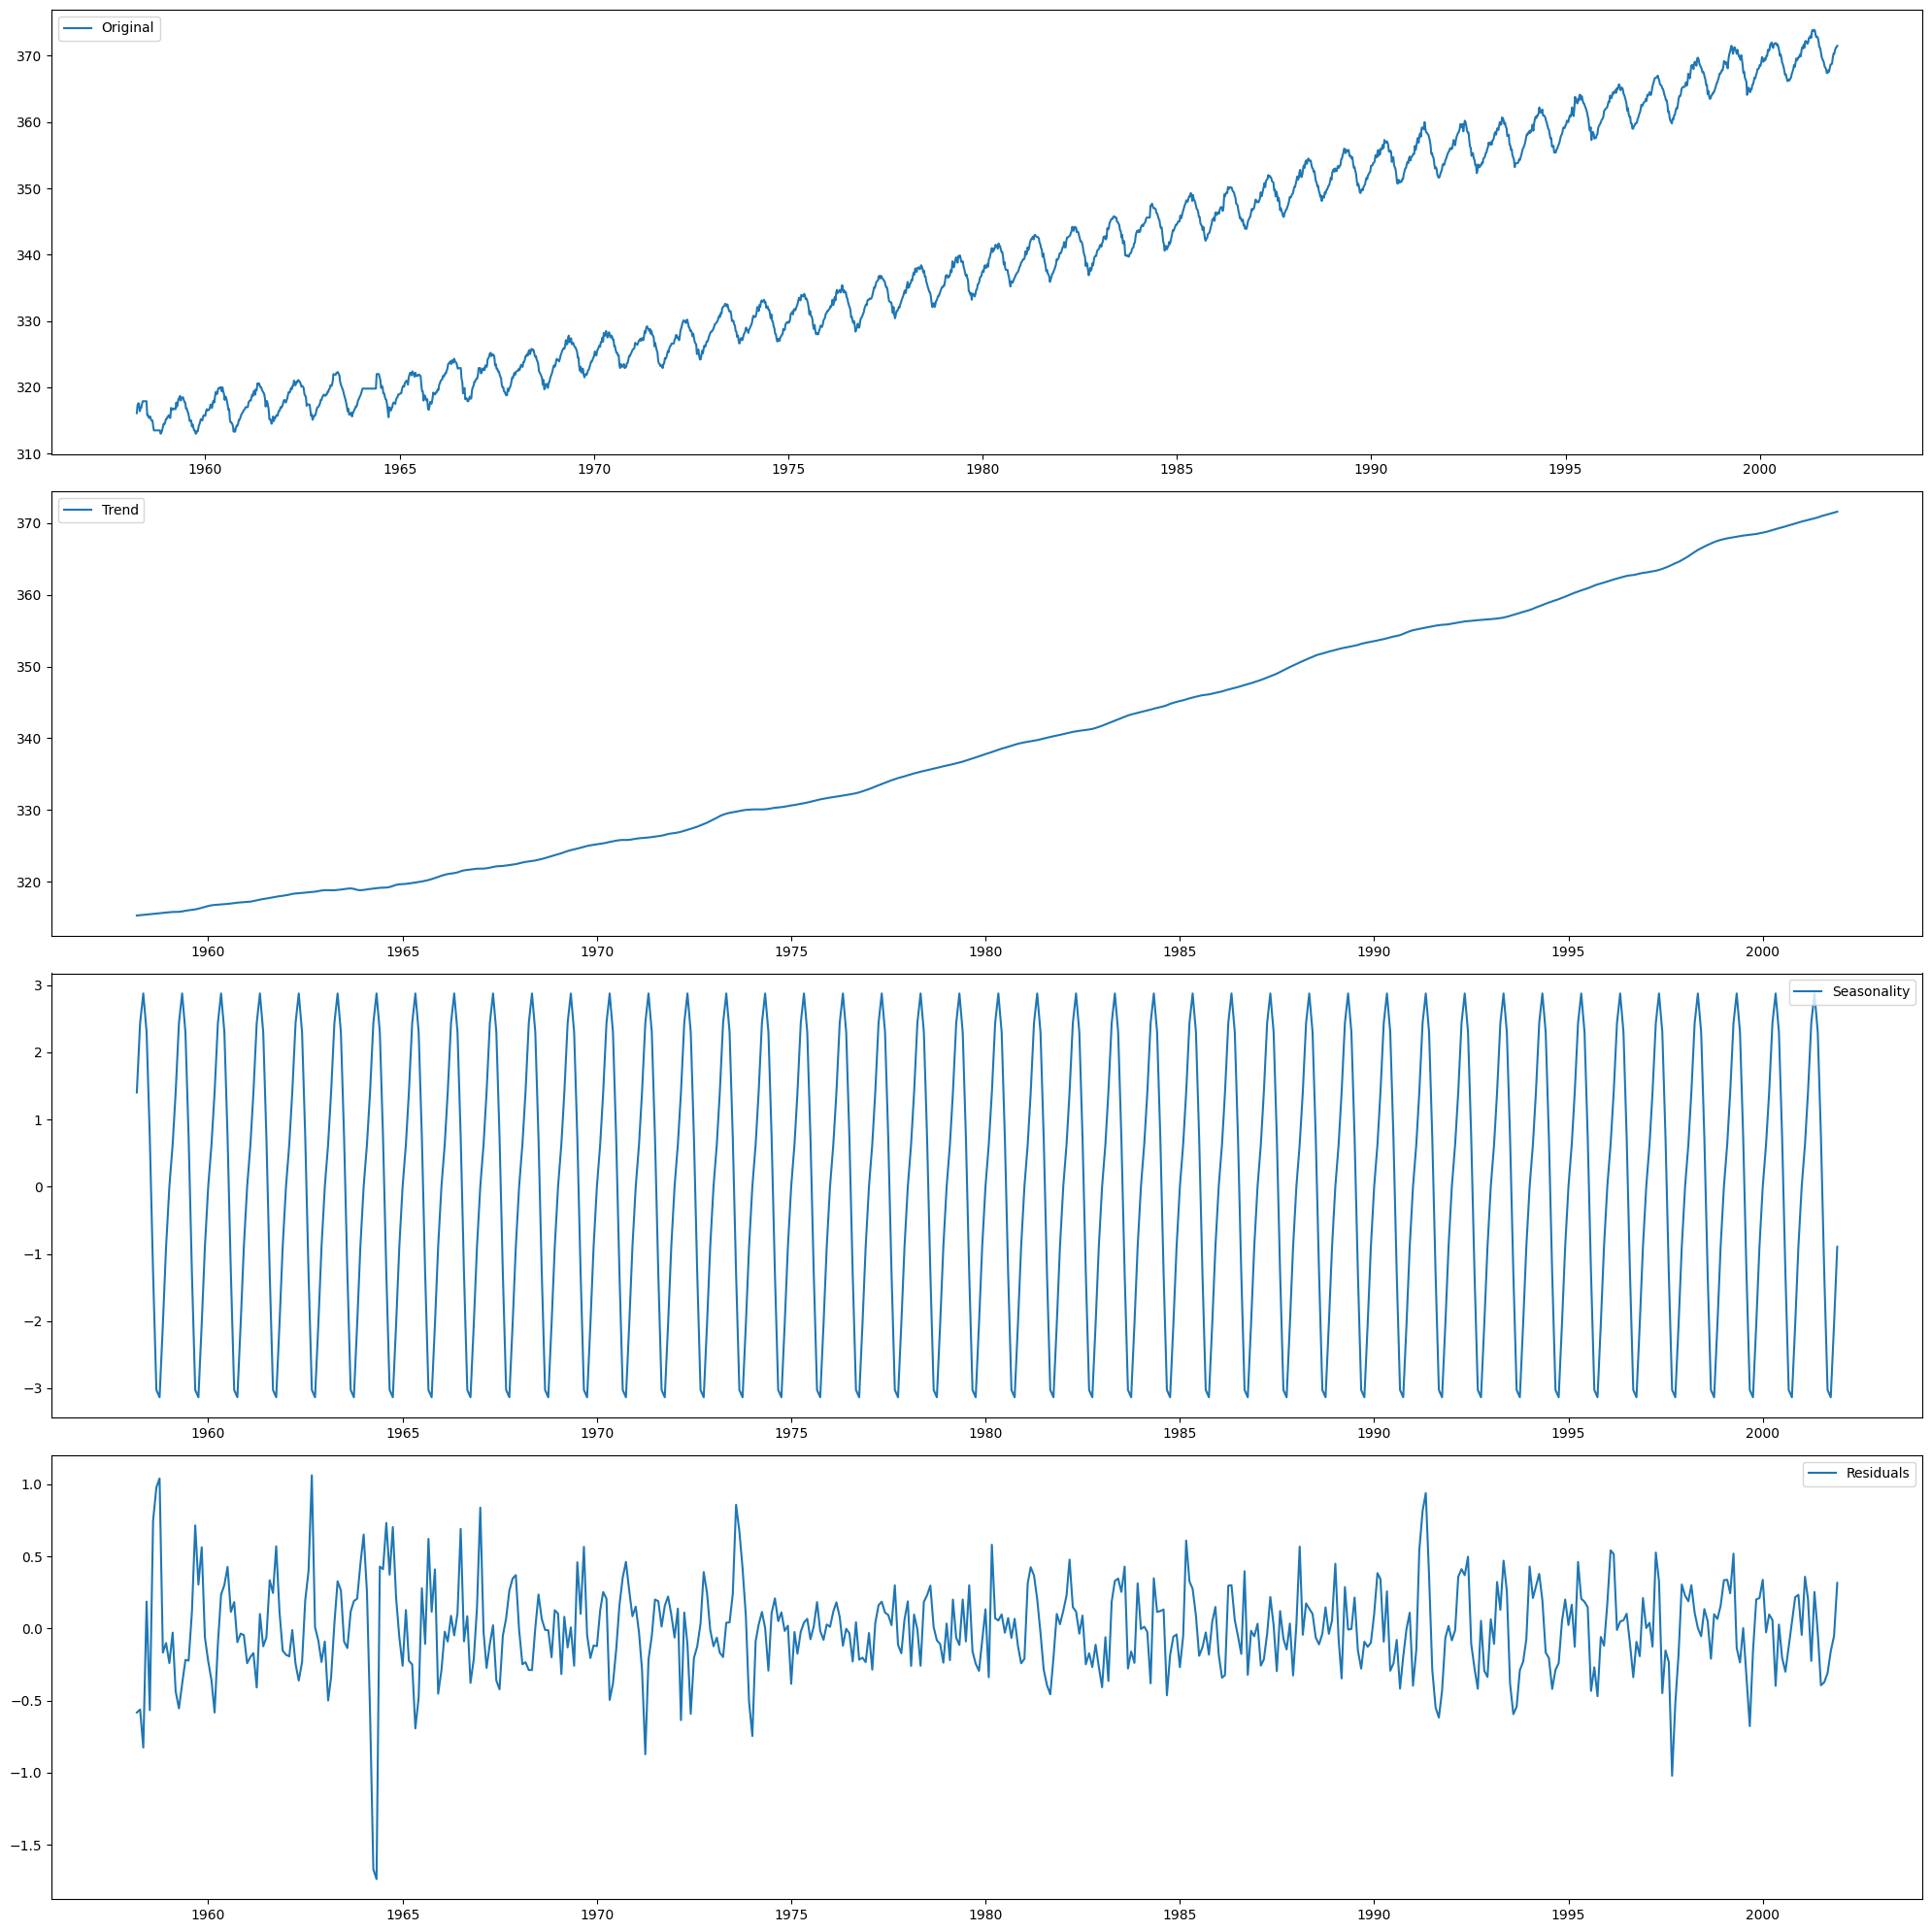

In [185]:
# Sustituimos los huecos por valores próximos
co2['co2'].fillna(method='ffill', inplace=True)

# fecha como índice
# co2.index = pd.DatetimeIndex(co2.index)

# La función resample() se utiliza para cambiar la frecuencia de muestreo de los datos en el dataframe.
# El argumento "MS" indica que se quiere resamplear los datos a una frecuencia mensual.
# 'MS' argument indicates that the data should be resampled by month (M) and the start (S) of the month.
# La función mean() es utilizada para calcular el promedio de los datos en el dataframe resampleado.

y = co2['co2'].resample('MS').mean()
# plt.plot(y)

# Para que la descomposición dé valores no nulos en trend, se añade este parámetro: extrapolate_trend='freq'
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(co2, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [186]:
co2trend = pd.DataFrame(trend)
co2trend

,trend
1958-03-01,315.280507
1958-04-01,315.324538
1958-05-01,315.368568
1958-06-01,315.412599
1958-07-01,315.456629
...,...
2001-08-01,371.086526
2001-09-01,371.214085
2001-10-01,371.341644
2001-11-01,371.469203


In [187]:
# Agrupar por año y promediar los valores
co2trend = co2trend.resample('Y').mean()
co2trend

,trend
1958-12-31,315.482558
1959-12-31,316.013142
1960-12-31,316.890295
1961-12-31,317.603524
1962-12-31,318.449080
1963-12-31,318.887795
1964-12-31,319.181128
1965-12-31,320.053316
1966-12-31,321.367135
1967-12-31,322.114740


***

### Emisiones del hombre

https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv

In [188]:
emissions = pd.read_csv('owid-co2-data.csv')
emissions

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [189]:
emissions = emissions[["year", "co2"]]
emissions

,year,co2
0,1850,NaN
1,1851,NaN
2,1852,NaN
3,1853,NaN
4,1854,NaN
...,...,...
46518,2017,9.596
46519,2018,11.795
46520,2019,11.115
46521,2020,10.608


In [190]:
emissions = emissions.groupby(by="year").sum()
emissions

,co2
year,
1750,56.106
1751,56.106
1752,56.124
1753,56.124
1754,56.148
...,...
2017,234500.508
2018,238741.382
2019,239925.740


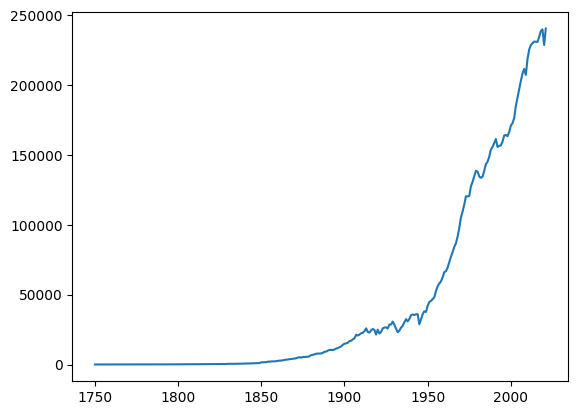

In [191]:
plt.plot(emissions)

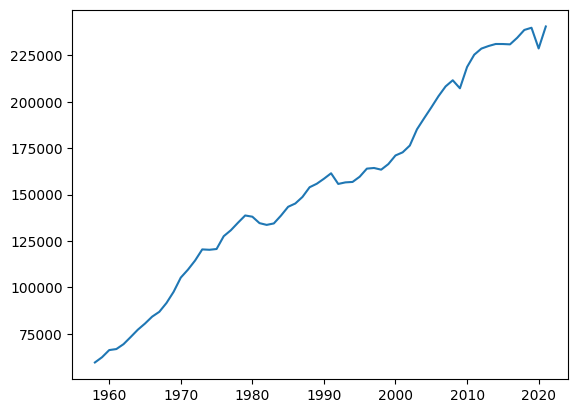

In [192]:
# Recorta desde 1958
emissions = emissions[208:]
plt.plot(emissions)

In [193]:
# fecha como índice
# emissions.index = pd.DatetimeIndex(emissions.index)
emissions.index = pd.to_datetime(emissions.index, format='%Y') # Convertir índice que sólo tiene el año en índice de fecha
emissions

,co2
year,
1958-01-01,59585.727
1959-01-01,62419.966
1960-01-01,66263.283
1961-01-01,66821.549
1962-01-01,69450.852
...,...
2017-01-01,234500.508
2018-01-01,238741.382
2019-01-01,239925.740


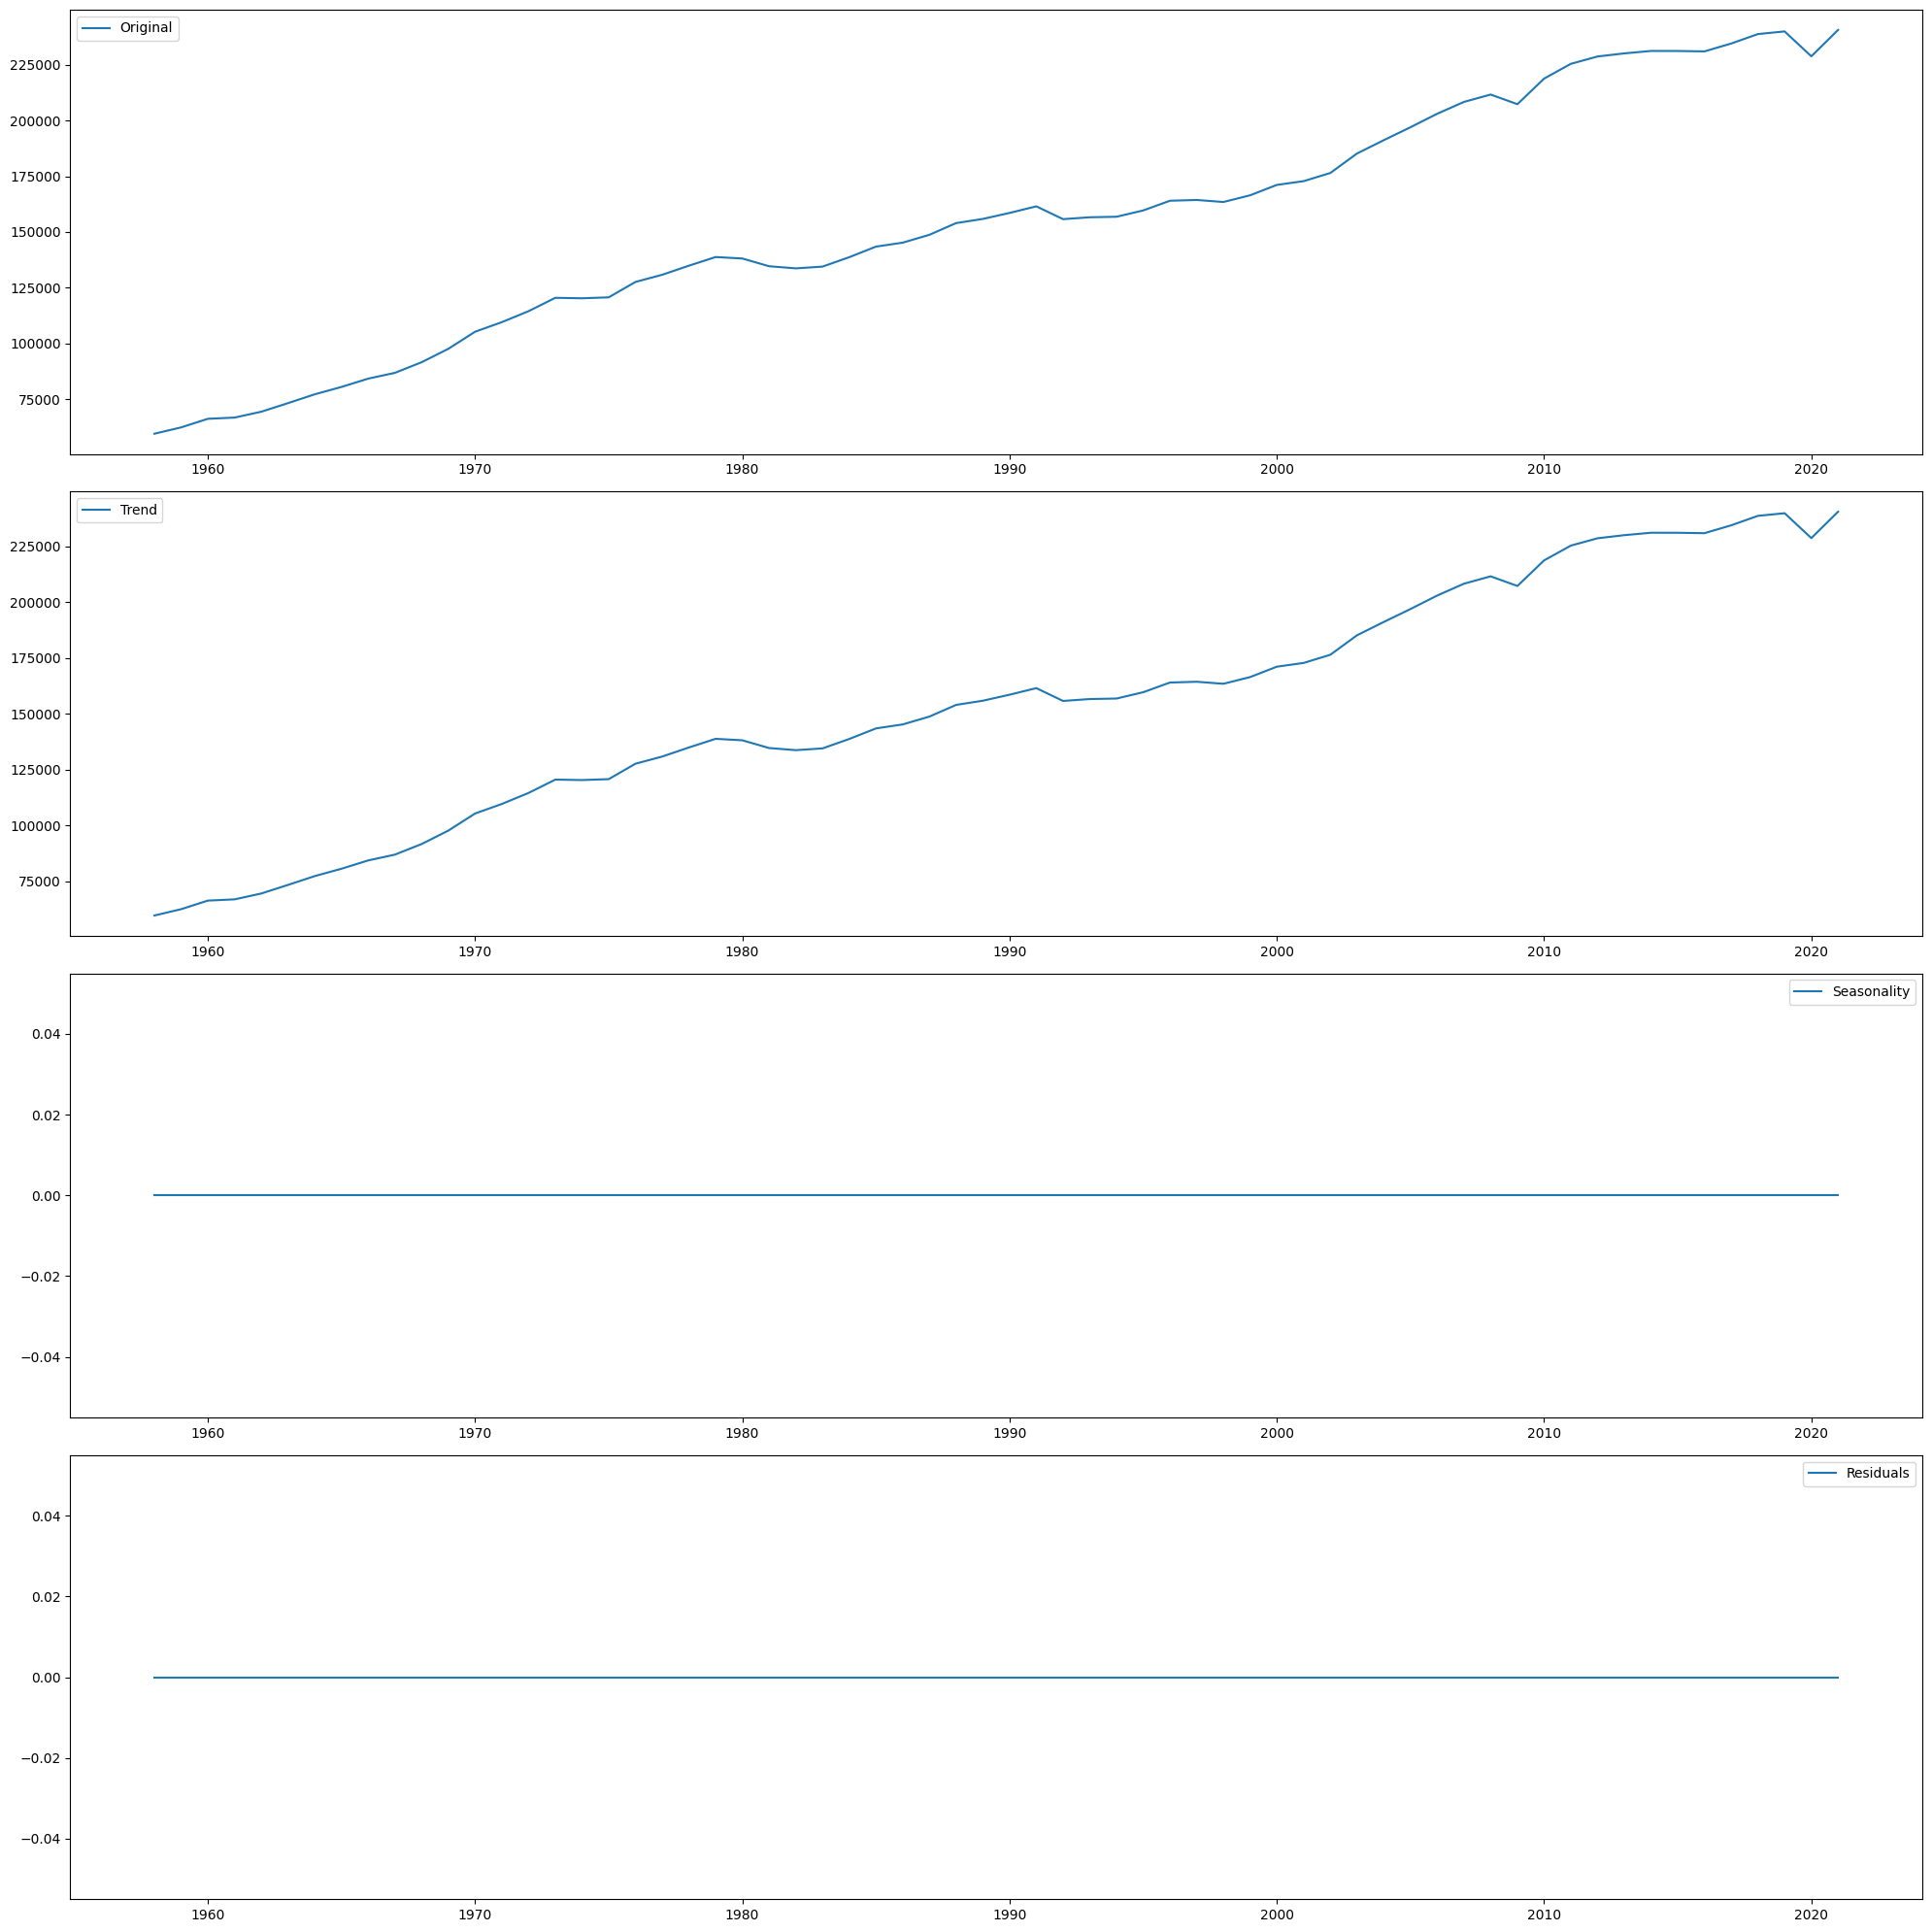

In [194]:
decomposition = sm.tsa.seasonal_decompose(emissions, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(emissions, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [195]:
# Factor de escala para comparar tendencias
co2trendScaled = co2trend * 300
co2trendScaled

,trend
1958-12-31,94644.767548
1959-12-31,94803.942708
1960-12-31,95067.088542
1961-12-31,95281.057292
1962-12-31,95534.723958
1963-12-31,95666.338542
1964-12-31,95754.338542
1965-12-31,96015.994792
1966-12-31,96410.140625
1967-12-31,96634.421875


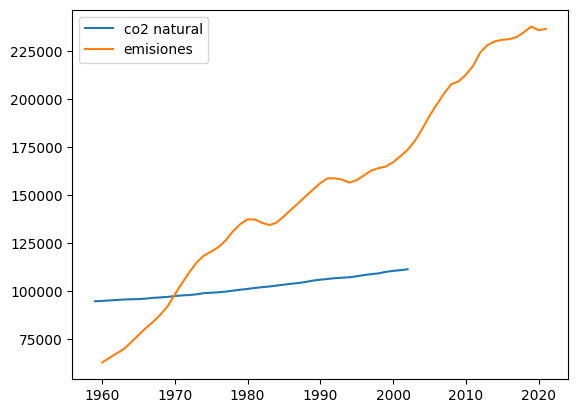

In [197]:
plt.plot(co2trendScaled)
plt.plot(emissionsMA)
plt.legend(['co2 natural', 'emisiones'])
plt.show()

In [204]:
# Otra fuente más extensa en el tiempo
# https://datahub.io/core/co2-ppm
co2ext = pd.read_csv("co2-annmean-mlo_csv.csv")
co2ext["co2"] = co2ext["Mean"]
co2ext.index = pd.DatetimeIndex(co2ext.Year)
co2ext = co2ext[["co2"]]
co2ext

,co2
Year,
1959-11-01,315.97
1960-11-01,316.91
1961-11-01,317.64
1962-11-01,318.45
1963-11-01,318.99
1964-11-01,319.62
1965-11-01,320.04
1966-11-01,321.38
1967-11-01,322.16


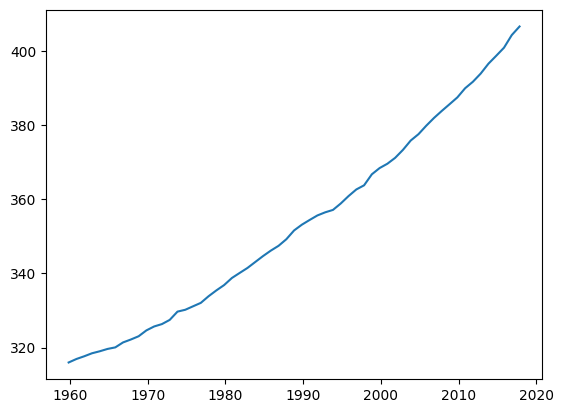

In [205]:
plt.plot(co2ext)

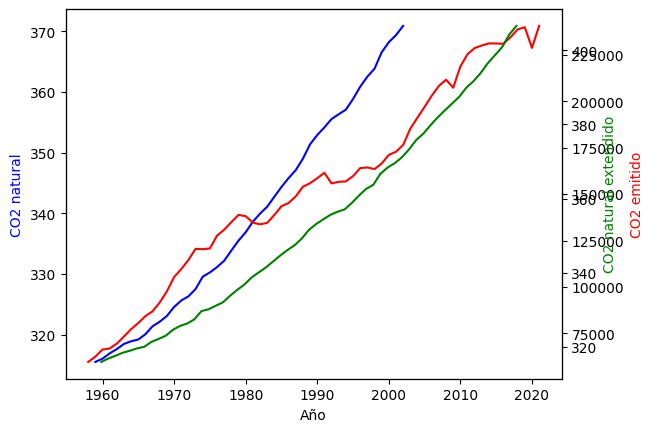

In [206]:
# Dibujamos 3 dataframes en una sola gráfica con 3 escalas diferentes
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2trend, 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('CO2 natural', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissions, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

# Tercer eje
ax3.plot(co2ext, 'g-')
ax3.set_ylabel('CO2 natural extendido', color='g')

plt.show()

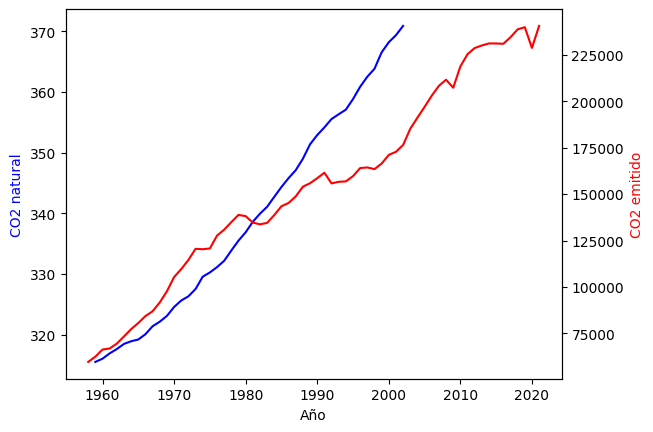

In [216]:
# 2 primeros
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2trend, 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('CO2 natural', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissions, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

plt.show()

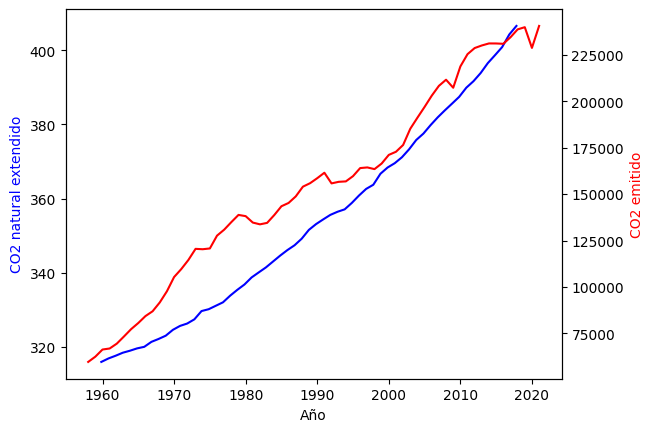

In [217]:
# 2 últimos
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2ext, 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('CO2 natural extendido', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissions, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

plt.show()

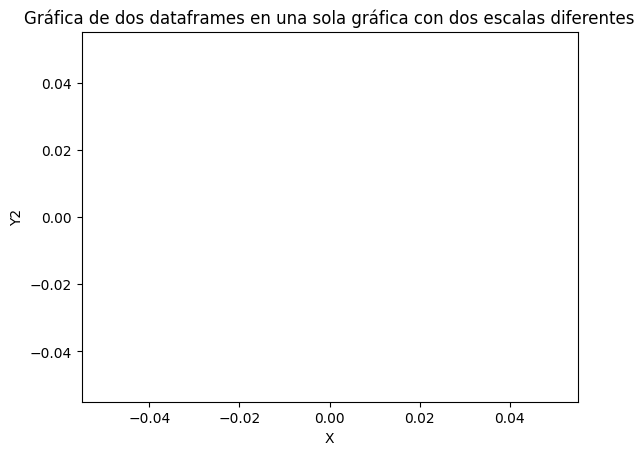

In [215]:
# INTENTO FALLIDO DE Graficar dos dataframes en una sola gráfica con dos escalas diferentes utilizando la librería seaborn:
import seaborn as sns

# sns.lineplot() para graficar el primer dataframe en un eje, utilizando una escala.
sns.lineplot(y="trend", data=co2trend)

# especificar que se grafique en el mismo eje utilizando el parámetro ax y
# especificando el eje actual plt.gca() y utilizar el parámetro secondary_y=True:
sns.lineplot(y="co2", data=emissions, ax=plt.gca())

# Personaliza las etiquetas y títulos de tus ejes y gráfica
plt.xlabel('X')
plt.ylabel('Y1')
plt.ylabel('Y2')

plt.title("Gráfica de dos dataframes en una sola gráfica con dos escalas diferentes")

plt.show()

In [220]:
# Moving Average = 3
emissionsMA = emissions.rolling(window=6).mean()

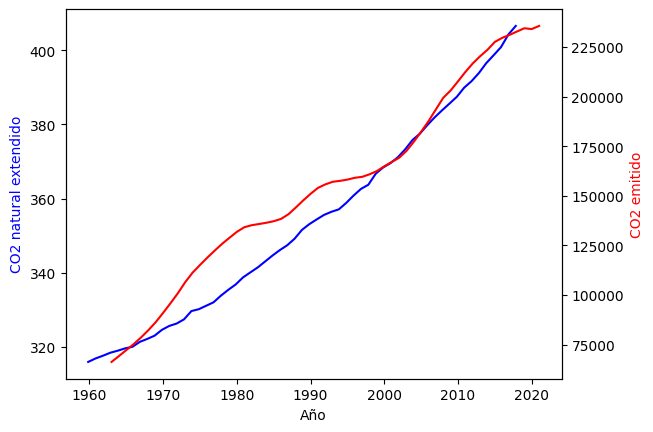

In [221]:
# 2 últimos con promedio
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2ext, 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('CO2 natural extendido', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissionsMA, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

plt.show()

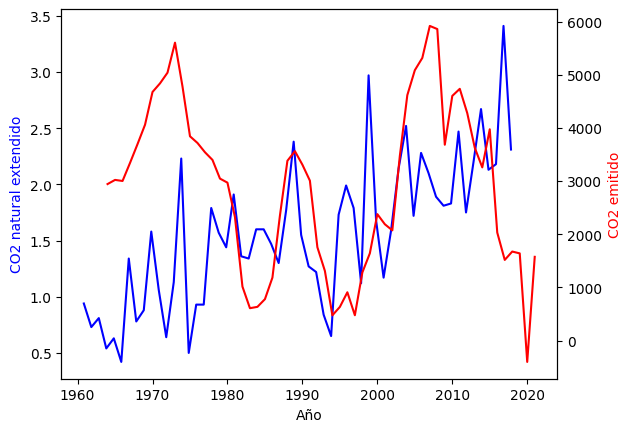

In [222]:
# 2 últimos con promedio y diff
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2ext.diff(), 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('Delta CO2 natural extendido', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissionsMA.diff(), 'r-')
ax2.set_ylabel('Delta CO2 emitido', color='r')

plt.show()

In [234]:
emissionsMA

,co2,x
year,,
1958-01-01,NaN,1958-01-01
1959-01-01,NaN,1959-01-01
1960-01-01,NaN,1960-01-01
1961-01-01,NaN,1961-01-01
1962-01-01,NaN,1962-01-01
...,...,...
2017-01-01,231096.974500,2017-01-01
2018-01-01,232771.835667,2018-01-01
2019-01-01,234412.106833,2019-01-01


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

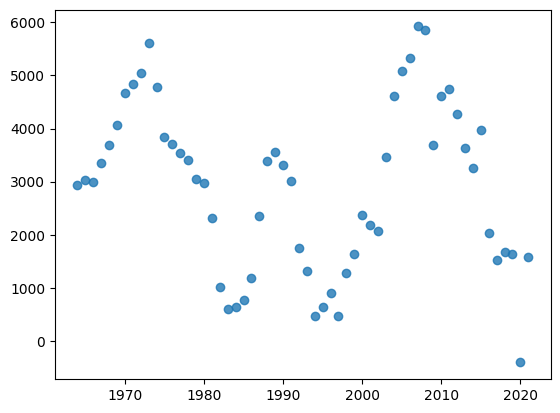

In [235]:
# Crear dataframe a partir de emissionsMA.index para la columna x y emissionsMA.diff() para la columna y
# df = pd.DataFrame({"x": emissionsMA.index, "y": emissionsMA.diff()})
# df.dtype()

# # Dibujar regresión lineal con seaborn del dataframe data
# sns.regplot(x='x', y='y', data=df)
sns.regplot(x=emissionsMA.index, y=emissionsMA.co2.diff())


# plt.show()

In [236]:
# regresión lineal
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo
linreg = LinearRegression()

# Entrenamos el modelo
x = emissionsMA.index
y = emissionsMA.co2.diff()
linreg.fit(x, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

ValueError: Expected 2D array, got 1D array instead:
array=['1958-01-01T00:00:00.000000000' '1959-01-01T00:00:00.000000000'
 '1960-01-01T00:00:00.000000000' '1961-01-01T00:00:00.000000000'
 '1962-01-01T00:00:00.000000000' '1963-01-01T00:00:00.000000000'
 '1964-01-01T00:00:00.000000000' '1965-01-01T00:00:00.000000000'
 '1966-01-01T00:00:00.000000000' '1967-01-01T00:00:00.000000000'
 '1968-01-01T00:00:00.000000000' '1969-01-01T00:00:00.000000000'
 '1970-01-01T00:00:00.000000000' '1971-01-01T00:00:00.000000000'
 '1972-01-01T00:00:00.000000000' '1973-01-01T00:00:00.000000000'
 '1974-01-01T00:00:00.000000000' '1975-01-01T00:00:00.000000000'
 '1976-01-01T00:00:00.000000000' '1977-01-01T00:00:00.000000000'
 '1978-01-01T00:00:00.000000000' '1979-01-01T00:00:00.000000000'
 '1980-01-01T00:00:00.000000000' '1981-01-01T00:00:00.000000000'
 '1982-01-01T00:00:00.000000000' '1983-01-01T00:00:00.000000000'
 '1984-01-01T00:00:00.000000000' '1985-01-01T00:00:00.000000000'
 '1986-01-01T00:00:00.000000000' '1987-01-01T00:00:00.000000000'
 '1988-01-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1990-01-01T00:00:00.000000000' '1991-01-01T00:00:00.000000000'
 '1992-01-01T00:00:00.000000000' '1993-01-01T00:00:00.000000000'
 '1994-01-01T00:00:00.000000000' '1995-01-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1997-01-01T00:00:00.000000000'
 '1998-01-01T00:00:00.000000000' '1999-01-01T00:00:00.000000000'
 '2000-01-01T00:00:00.000000000' '2001-01-01T00:00:00.000000000'
 '2002-01-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '2004-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '2006-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2010-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '2012-01-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2021-01-01T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [237]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
# y = b + m * x
b, m = polyfit(emissionsMA.index, emissionsMA.co2.diff(), 1)

plt.scatter(emissionsMA.index, emissionsMA.co2.diff(), s=0.3)
plt.scatter(emissionsMA.co2.diff(), b + m * emissionsMA.index, s=1, color="red")

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

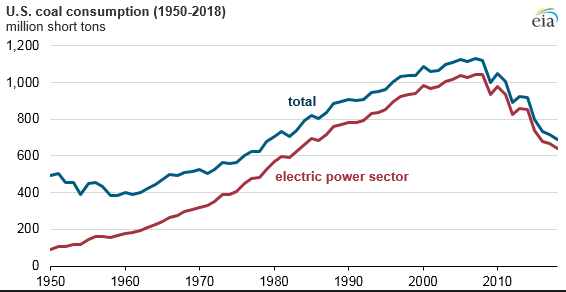

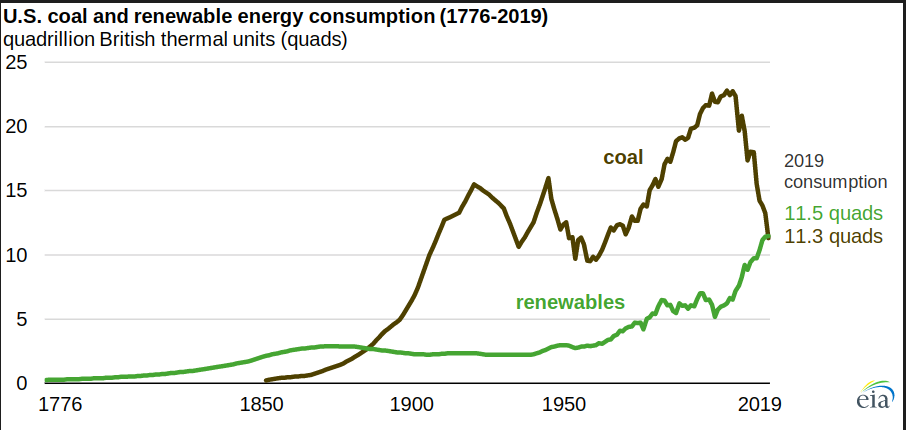